## WASTE CLASSIFICATION USING CNN MODEL

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

test_path = "dataset/TEST"
train_path = "dataset/TRAIN"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

x_data = []
y_data = []

for category in glob(train_path + '/*'):
    print(f"Processing category: {category}")
    for file in tqdm(glob(category + '/*.jpg')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (128, 128))  # Resize images to a consistent size
        x_data.append(img_array)
        y_data.append(os.path.basename(category))

if len(x_data) == 0 or len(y_data) == 0:
    print("No images or labels found. Please check your file paths.")
else:
    print(f"Number of images: {len(x_data)}, Number of labels: {len(y_data)}")

data = pd.DataFrame({'image': x_data, 'label': y_data})
print(f"DataFrame shape: {data.shape}")

label_counts = data.label.value_counts()



Processing category: dataset/TRAIN\O


100%|██████████| 12565/12565 [00:16<00:00, 772.64it/s]


Processing category: dataset/TRAIN\R


100%|██████████| 9999/9999 [00:12<00:00, 830.93it/s]


Number of images: 22564, Number of labels: 22564
DataFrame shape: (22564, 2)


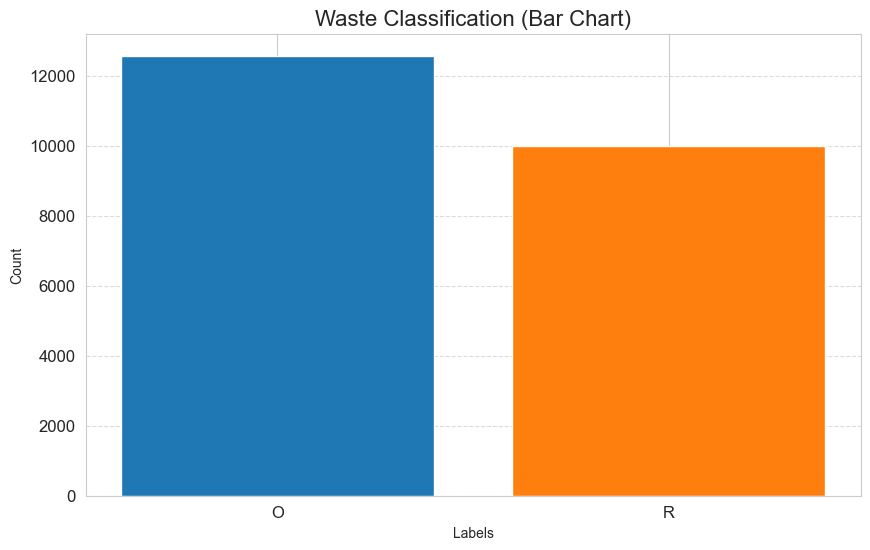

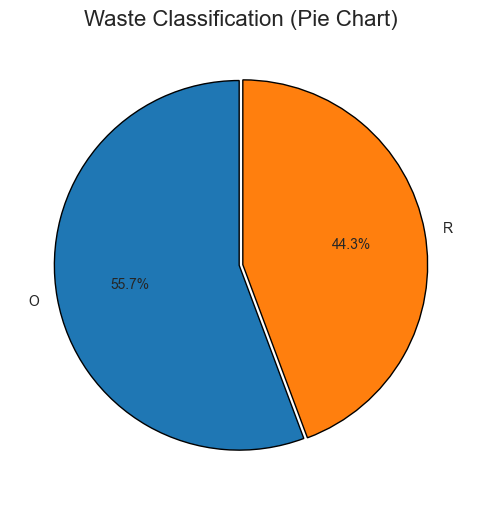

In [44]:
# Bar Chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 
plt.bar(label_counts.index, label_counts.values, color=colors[:len(label_counts)])
plt.title('Waste Classification (Bar Chart)', fontsize=16)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette for pie chart
plt.pie(label_counts, labels=label_counts.index, colors=colors[:len(label_counts)], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1}, explode=[0.01, 0.01])
plt.title('Waste Classification (Pie Chart)', fontsize=16)
plt.show()

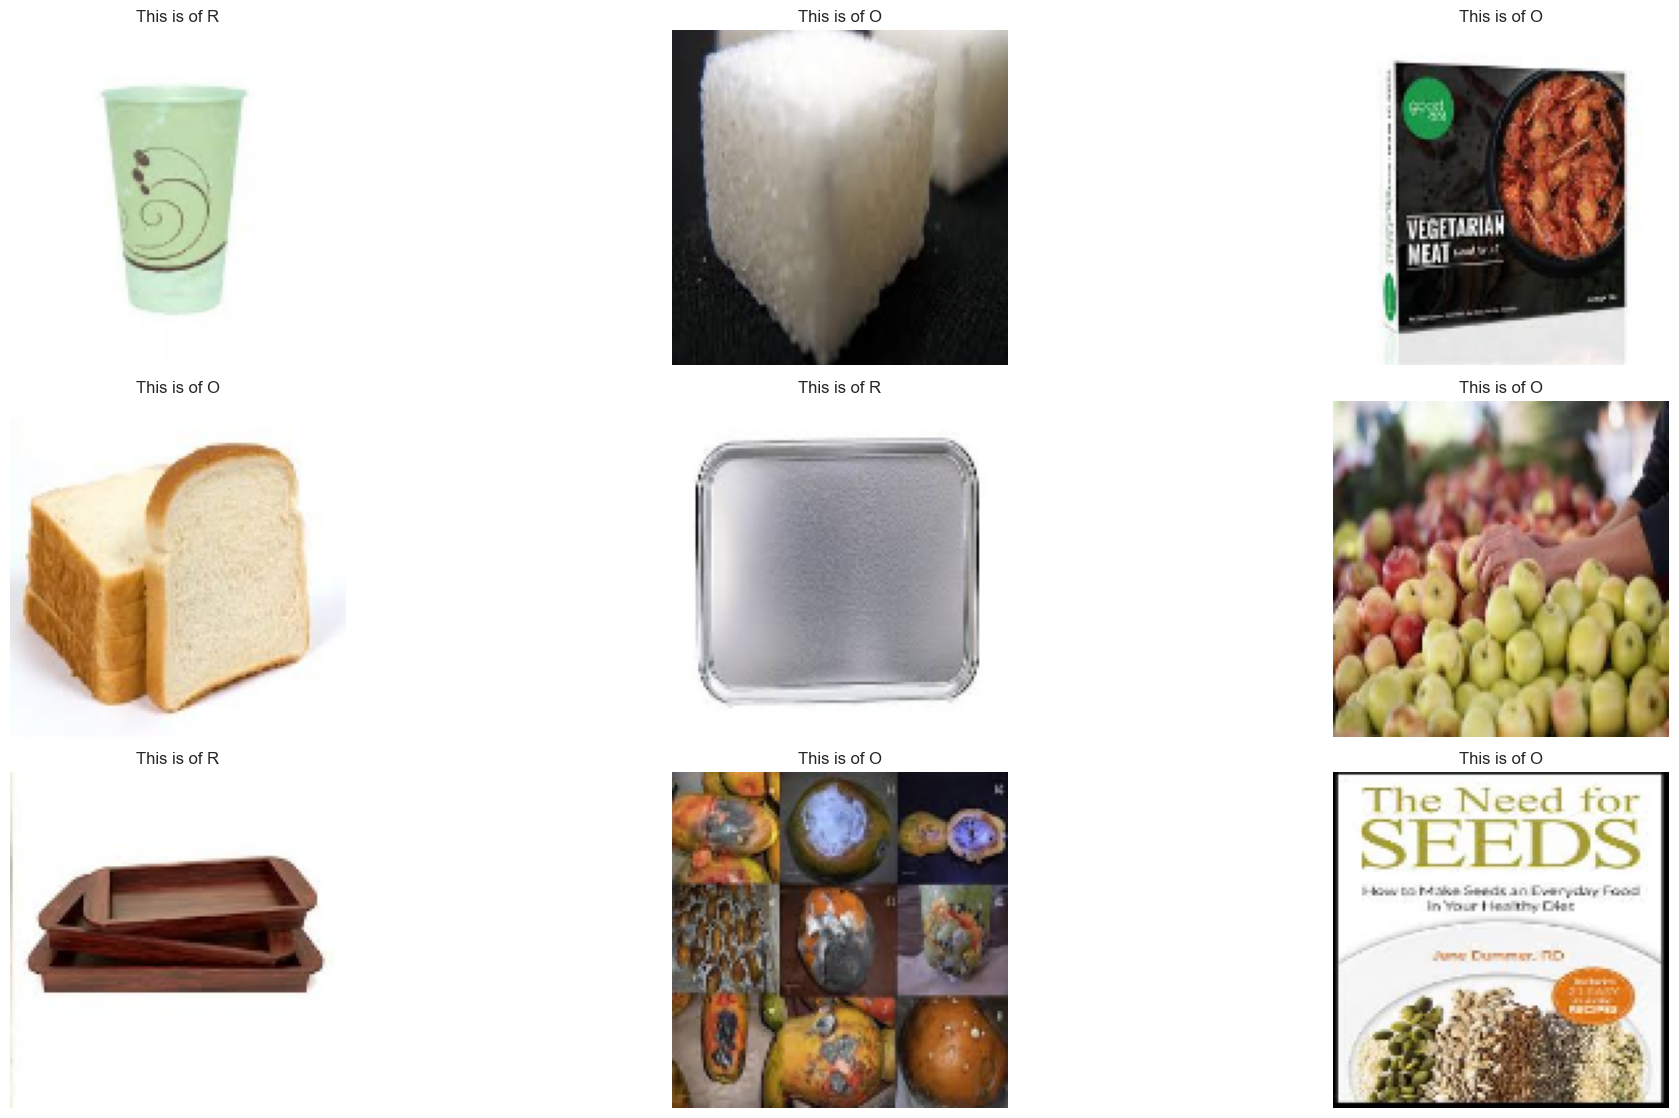

In [45]:
plt.figure(figsize=(20, 15))

for i in range(9):  
    plt.subplot(4, 3,(i%12)+1)  
    index = np.random.randint(len(data.image)) 
    plt.title(f'This is of {data.label[index]}') 
    plt.imshow(data.image[index])
    plt.axis("off") 

plt.tight_layout() 
plt.show()


In [46]:
# Convert labels to binary (0 for organic, 1 for recyclable)
data['label'] = data['label'].apply(lambda x: 0 if x == 'O' else 1)

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data['image'], data['label'], test_size=0.2, random_state=42)

# Convert lists to numpy arrays
X_train = np.array(X_train.tolist())
X_val = np.array(X_val.tolist())
y_train = np.array(y_train.tolist())
y_val = np.array(y_val.tolist())

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

## CNN-Convolutional Neural Network

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))



Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 103s 174ms/step - accuracy: 0.7832 - loss: 0.4864 - val_accuracy: 0.8444 - val_loss: 0.3934
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 106s 187ms/step - accuracy: 0.8305 - loss: 0.4043 - val_accuracy: 0.8380 - val_loss: 0.3800
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 96s 170ms/step - accuracy: 0.8461 - loss: 0.3664 - val_accuracy: 0.8635 - val_loss: 0.3537
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 89s 158ms/step - accuracy: 0.8604 - loss: 0.3403 - val_accuracy: 0.8724 - val_loss: 0.3511
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 88s 156ms/step - accuracy: 0.8673 - loss: 0.3245 - val_accuracy: 0.8777 - val_loss: 0.3059
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 89s 158ms/step - accuracy: 0.8831 - loss: 0.2844 - val_accuracy: 0.8781 - val_loss: 0.3136
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/step - accuracy: 0.8983 - loss: 0.2584 - val_accuracy: 0.8790 - val_loss: 0.3222
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 97s 171ms/step - accuracy: 0.9090 - loss:

142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8793 - loss: 0.3705
Validation Loss: 0.3873986303806305
Validation Accuracy: 0.8803456425666809


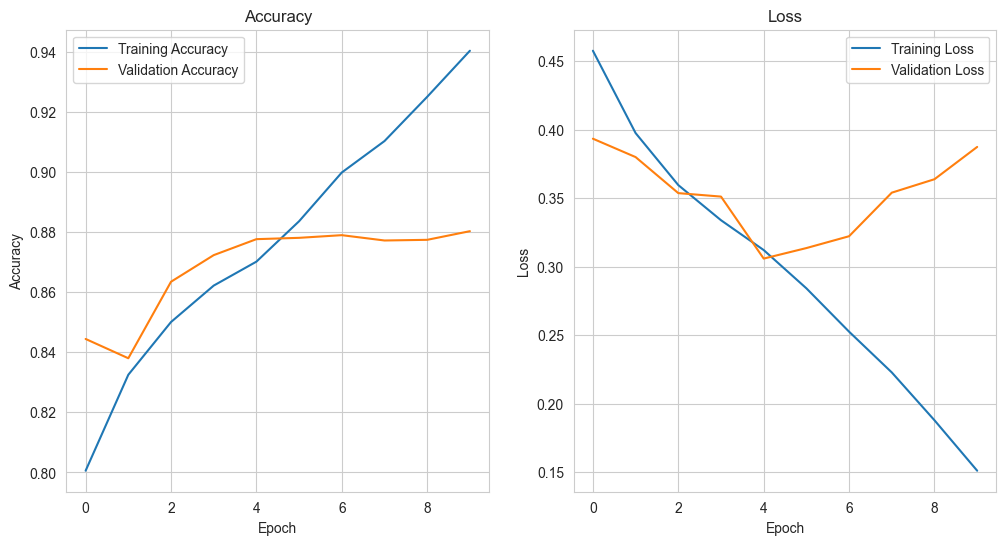

In [51]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [52]:
# Test the model on new images
def predict_waste(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)
    
    prediction = model.predict(img_expanded)
    label = 'Organic' if prediction < 0.5 else 'Recyclable'
    
    plt.imshow(img)
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


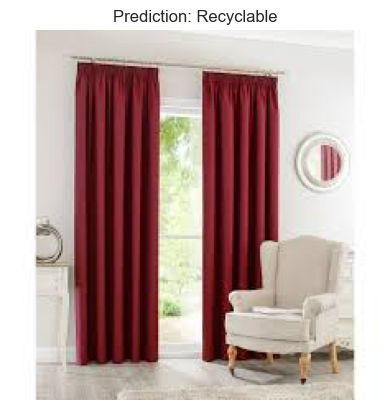

None


In [53]:
image_path = 'C:\OneDrive\Desktop\waste classification\dataset\TEST\R\R_10003.jpg'
print(predict_waste(image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


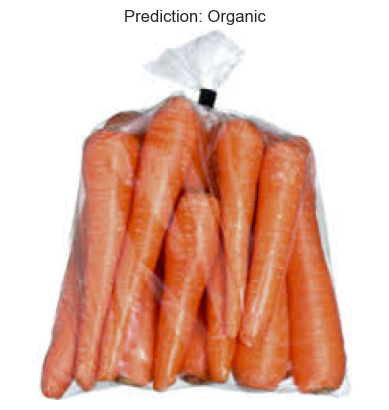

None


In [54]:

image_path = 'C:\OneDrive\Desktop\waste classification\dataset\TEST\O\O_12575.jpg'
print(predict_waste(image_path))